In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

import seaborn as sns
sns.set()

DATA_DIR = Path('./data')
REAL_DATA = Path(DATA_DIR / 'MULTI_VP_profiles/')
PROC_DIR = Path(DATA_DIR / 'processed')


In [2]:
real_files = [f for f in PROC_DIR.iterdir()]
len(real_files)

11771

In [3]:
# removing the weird file
for f in real_files:
    df = pd.read_csv(f, skiprows=2, sep=',')
    found = False
    for val in df['T [MK]']:
        if val > 15:
            real_files.remove(f)
            found = True
            print(f)
            break
    if found: break

data/processed/profile_wso_CR1992_line_1504.csv


In [4]:
# data_dirs = [d for d in REAL_DATA.iterdir() if d.is_dir()]
# # real_files

# for d in data_dirs:
#     for f in d.iterdir():
#         df = pd.read_csv(f, skiprows=2, sep=',')
        
#         flag = 0
#         if not(df.isnull().values.any()):
#             for j in df.columns:
#                 if(df[j].dtype != np.int64 and df[j].dtype != np.float64 ): #verifying if there's no weird data. if there is, skip
#                     flag = 1
#                     break
#         else: 
#             flag = 1
            
#         if flag: 
#             print(f)
#             continue
        
#         with open(f, 'r') as tmp:
#             lines = tmp.readlines()

#             values = lines[2].replace('#', '').split(',')

#             values = [v.strip() for v in values]

#             lines[2] = ','.join(values) + '\n'

#             with open(f"{PROC_DIR / f.stem}.csv" , 'w') as out:
#                 out.writelines(lines)
                
# len([f for f in PROC_DIR.iterdir()])
#         # print(lines[2])

In [5]:
def plot_file_data(paths : list, xcol : str = None, columns : list = ['R [Rsun]', 'B [G]', 'alpha [deg]'], num_rows : int = 640, title : str = None):

    fig, axs = plt.subplots(nrows=len(columns), ncols=1, sharex=True)
    fig.set_figheight(3*len(columns))
    fig.set_figwidth(10)
    fig.set_dpi(200)
    for idx, ax in enumerate(axs):    
        ax.set(xlabel='', ylabel=columns[idx])
    
    x_values = xcol 
    if not xcol:
        x_values = [x for x in range(num_rows)]
    
    flag = False
    for path in paths:
        df = pd.read_csv(str(path),  skiprows=2, usecols=[xcol]+columns if xcol else columns)
        for j in df.columns:
            if(df[j].dtype != np.int64 and df[j].dtype != np.float64 ): #verifying if there's no weird data. if there is, skip
                flag = True
            break

        if (flag):
            continue
        
        if xcol:
            x_values = df[xcol]
                        
        for idx, ax in enumerate(axs):
            ax.plot(x_values, df[columns[idx]],  linewidth=0.5)
    
    
    for ax in axs:
        ax.set_yscale('log')
        # ax.set_xscale("log")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [6]:
plot_file_data(real_files, columns=['R [Rsun]', 'B [G]', 'alpha [deg]'])


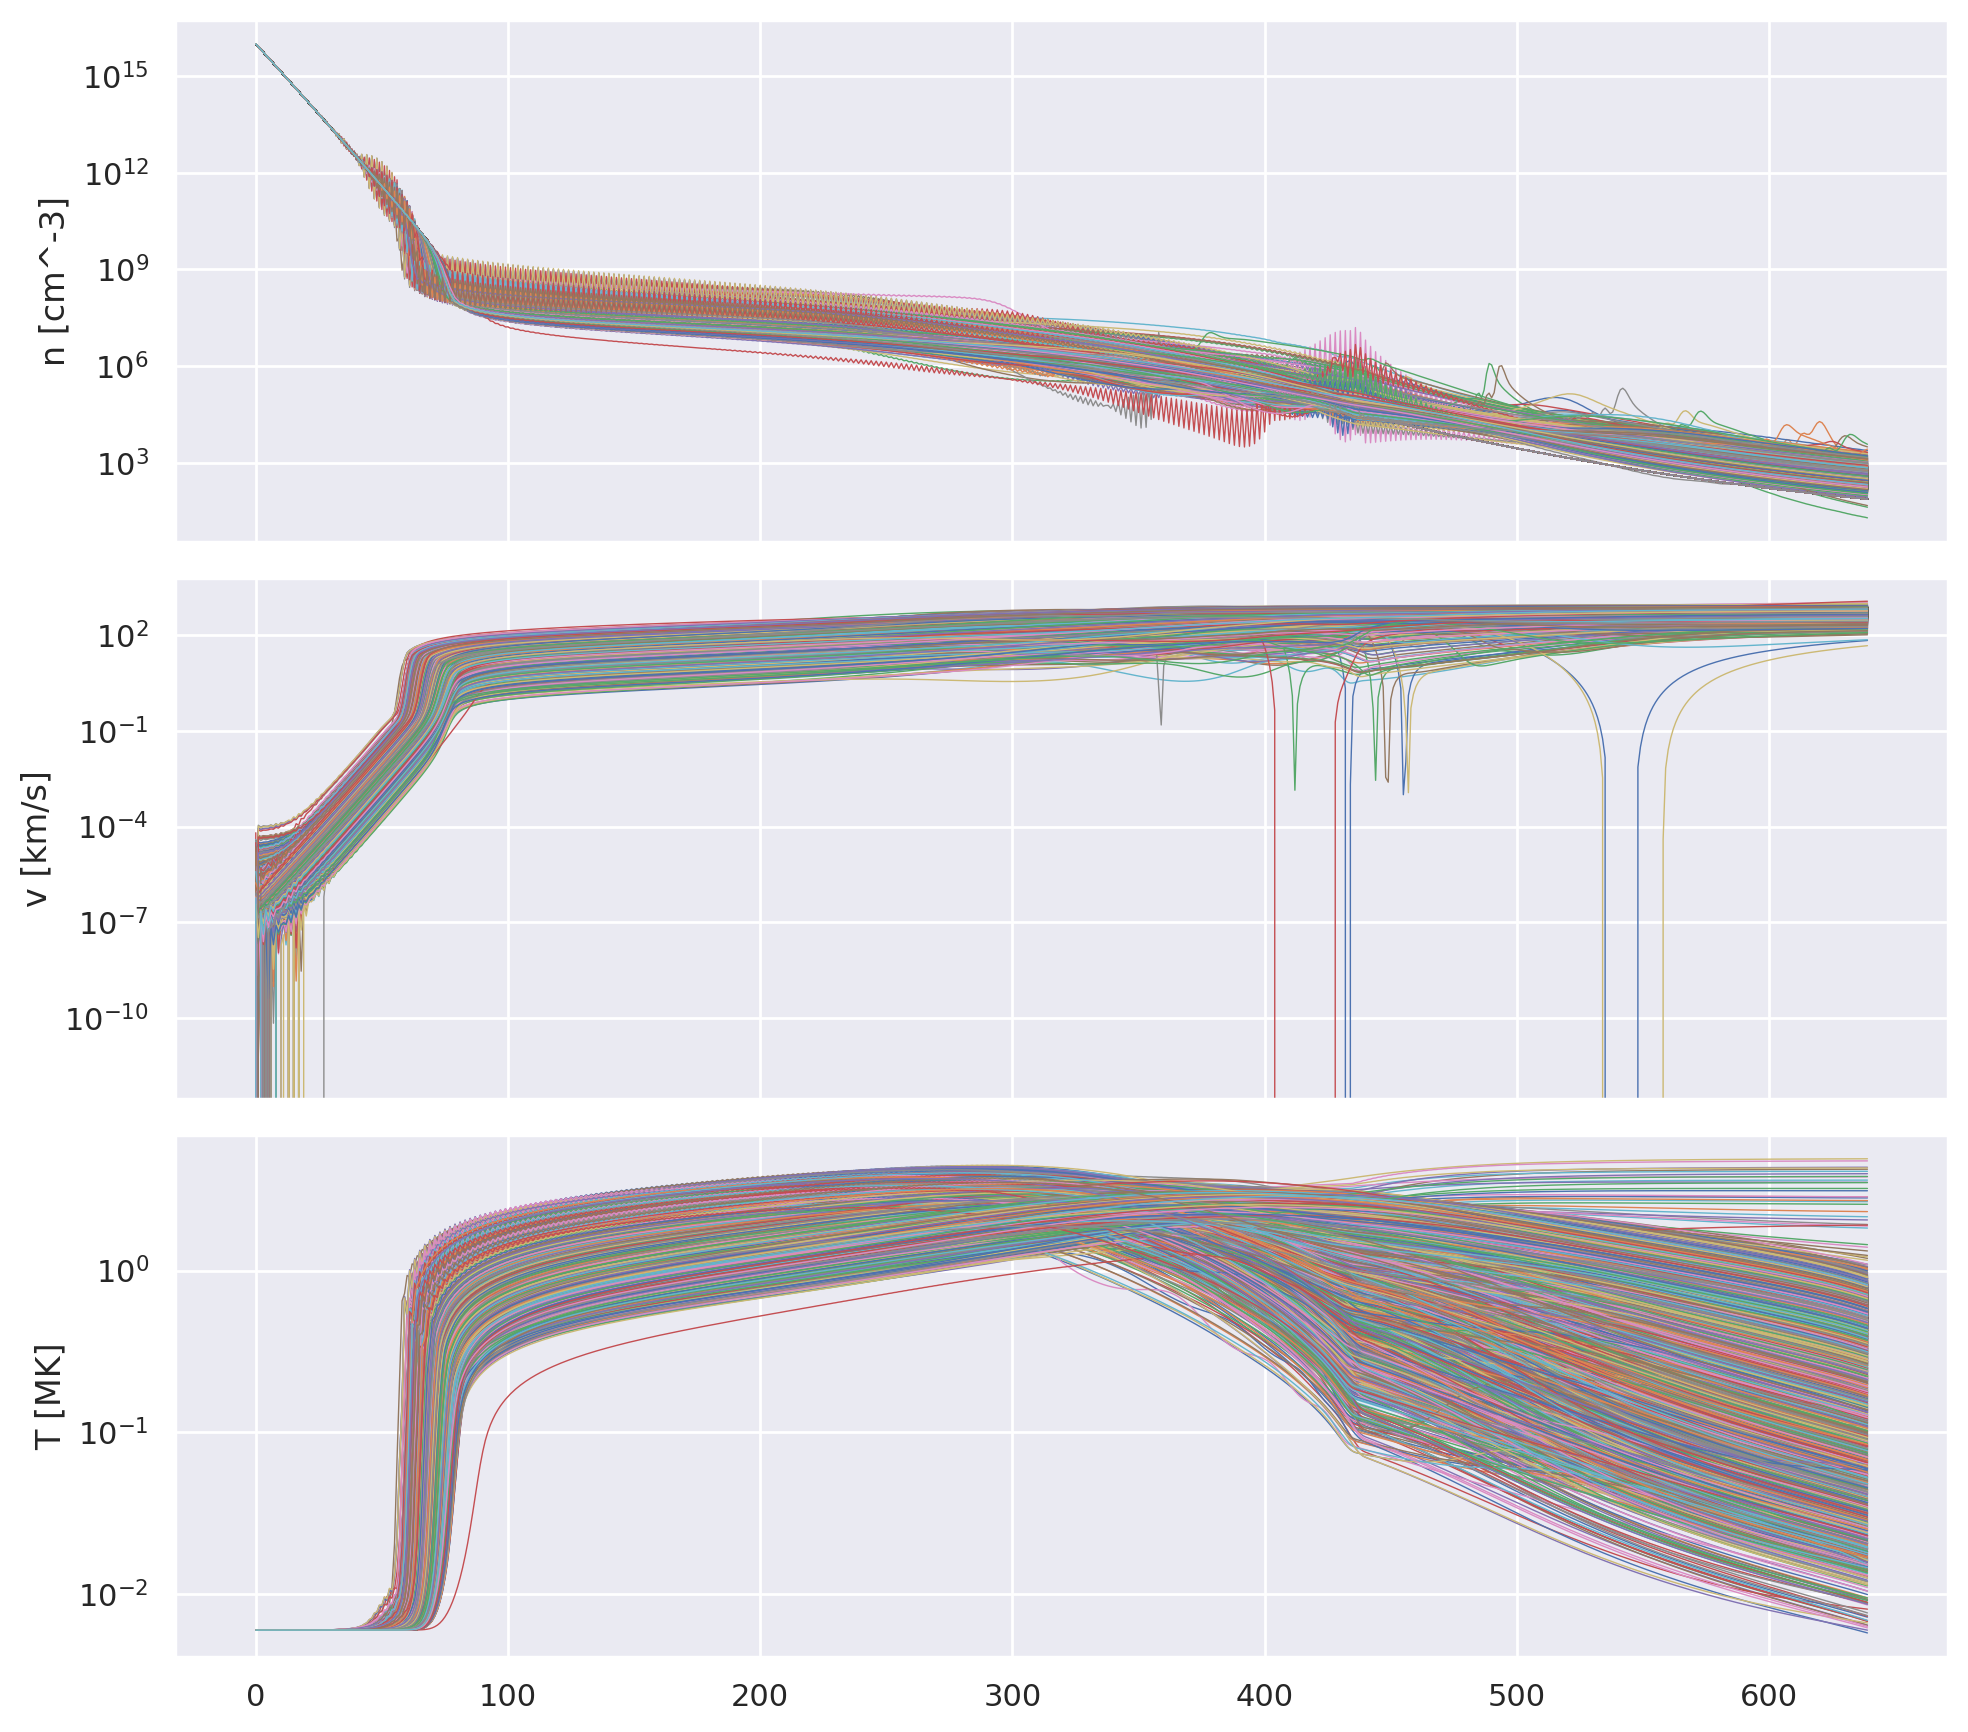

In [ ]:
plot_file_data(real_files, columns=['n [cm^-3]', 'v [km/s]', 'T [MK]'])

# Input Data Analysis

In [ ]:
inputs = pd.DataFrame(columns=['R [Rsun]', 'B [G]', 'alpha [deg]'])

for idx, f in enumerate(real_files):
    df = pd.read_csv(str(f),  skiprows=2, usecols=['R [Rsun]', 'B [G]', 'alpha [deg]'])

    inputs = pd.concat([inputs, df], ignore_index=True)
    sys.stdout.write('\033[K' + "file: " + str(idx) + " " + str(f) + '\r')
inputs.head()

,R [Rsun],B [G],alpha [deg]
0,1.000000,6.813160,-0.127607
1,1.000104,6.811385,-0.126912
2,1.000207,6.809607,-0.126205
3,1.000311,6.807825,-0.125486
4,1.000415,6.806039,-0.124753


In [ ]:
pd.describe_option('display.precision')
inputs.describe().apply(lambda s: s.apply('{0:.3f}'.format))

display.precision : int
    Floating point output precision in terms of number of places after the
    decimal, for regular formatting as well as scientific notation. Similar
    to ``precision`` in :meth:`numpy.set_printoptions`.
    [default: 6] [currently: 6]


,R [Rsun],B [G],alpha [deg]
count,7532800.000,7532800.000,7532800.000
mean,4.755,-0.537,1.884
std,7.165,91.951,14.728
min,1.000,-17541.107,-87.632
25%,1.021,-2.145,-0.108
50%,1.151,0.001,0.000
75%,4.250,2.053,0.999
max,31.501,247095.581,89.257


[Text(0.5, 0, 'R [Rsun]'), None, [Text(0, 0, '')]]

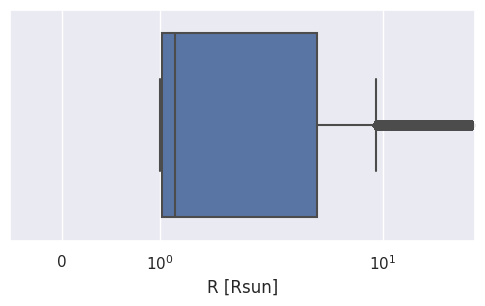

In [ ]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(inputs['R [Rsun]'], orient='h', ax=ax)

bp.set(xlabel="R [Rsun]", xscale="symlog", yticklabels=[])
# ax.set_xscale("log")
# ax.set_label("R [Rsun]")


[Text(0.5, 0, 'B [G]'), None, [Text(0, 0, '')]]

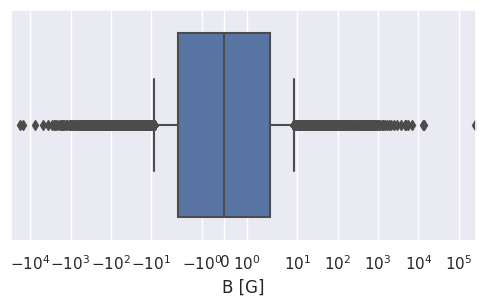

In [ ]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(inputs['B [G]'], orient='h', ax=ax)

bp.set(xlabel='B [G]', xscale="symlog", yticklabels=[])

[Text(0.5, 0, 'alpha [deg]'), None, [Text(0, 0, '')]]

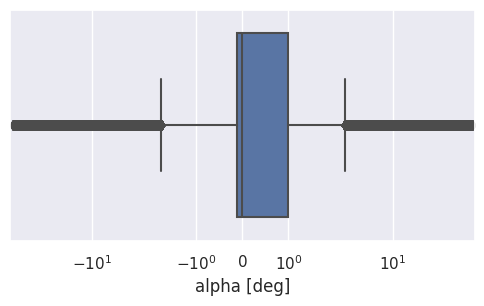

In [ ]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(inputs['alpha [deg]'], orient='h', ax=ax)

bp.set(xlabel='alpha [deg]', xscale="symlog", yticklabels=[])

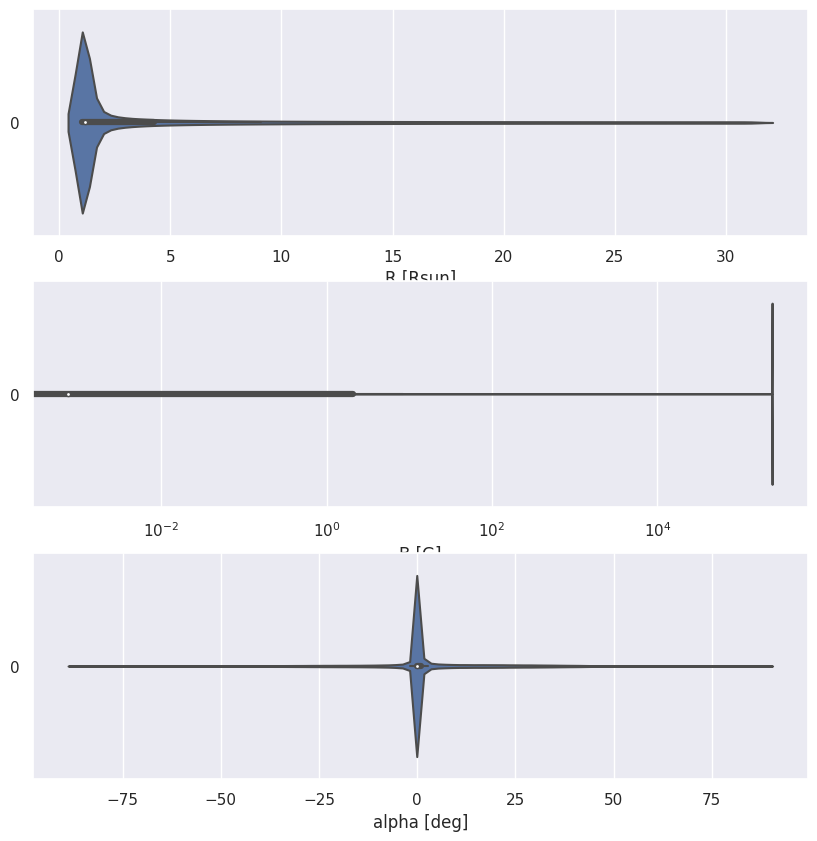

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))
sns.violinplot(inputs['R [Rsun]'], ax=axs[0], orient='h')
sns.violinplot(inputs['B [G]'], ax=axs[1],orient='h')
sns.violinplot(inputs['alpha [deg]'], ax=axs[2],orient='h')

axs[0].set_xlabel('R [Rsun]')
axs[1].set_xlabel('B [G]')
axs[2].set_xlabel('alpha [deg]')


axs[1].set_xscale("log")
# for ax in axs:
#     ax.set_xscale("symlog")

<AxesSubplot: >

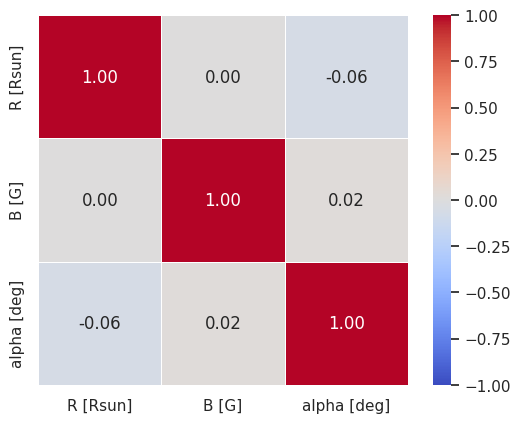

In [ ]:
corr = inputs.corr()

fig, ax = plt.subplots()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, xticklabels=True,
                                                yticklabels=True, figure=fig, ax=ax, annot=True, fmt='.2f',
                                                cmap='coolwarm', linewidths=.5)

# Output Variable Analysis

In [ ]:
outputs = pd.DataFrame(columns=['n [cm^-3]', 'v [km/s]', 'T [MK]'])

df_list = [
    pd.read_csv(str(f),  skiprows=2, usecols=['n [cm^-3]', 'v [km/s]', 'T [MK]'])
    for f in real_files
]
outputs = pd.concat(df_list, ignore_index=True)
outputs.head()

,n [cm^-3],v [km/s],T [MK]
0,1.000375e+16,3.315413e-07,0.006
1,8.194385e+15,1.452716e-07,0.006
2,6.716319e+15,2.123098e-07,0.006
3,5.498820e+15,2.177507e-07,0.006
4,4.506467e+15,3.132986e-07,0.006


In [ ]:
outputs.describe()[['n [cm^-3]']].values.flatten()

array([7.53280000e+06, 8.63020673e+13, 6.83954911e+14, 1.97279336e+01,
       1.62225177e+04, 2.35081766e+06, 2.13113188e+07, 1.00991729e+16])

[Text(0.5, 0, 'n [cm^-3]'), None, [Text(0, 0, '')]]

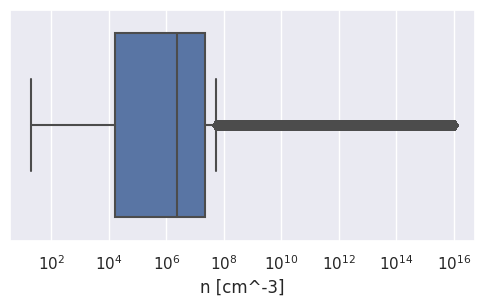

In [ ]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(outputs['n [cm^-3]'], orient='h', ax=ax)

bp.set(xlabel='n [cm^-3]', xscale="log", yticklabels=[])

[Text(0.5, 0, 'v [km/s]'), None, [Text(0, 0, '')]]

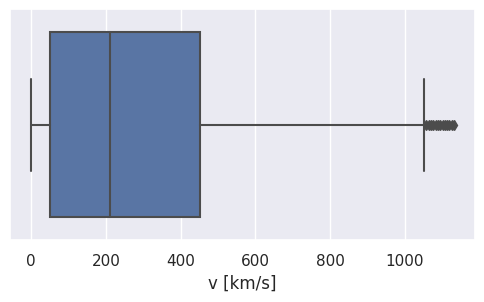

In [ ]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(outputs['v [km/s]'], orient='h', ax=ax)

bp.set(xlabel='v [km/s]', xscale="linear", yticklabels=[])

[Text(0.5, 0, 'T [MK]'), None, [Text(0, 0, '')]]

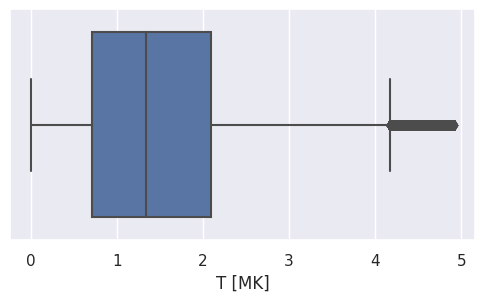

In [ ]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(outputs['T [MK]'], orient='h', ax=ax)

bp.set(xlabel='T [MK]', xscale="linear", yticklabels=[])

Text(0.5, 0, 'T [MK]')

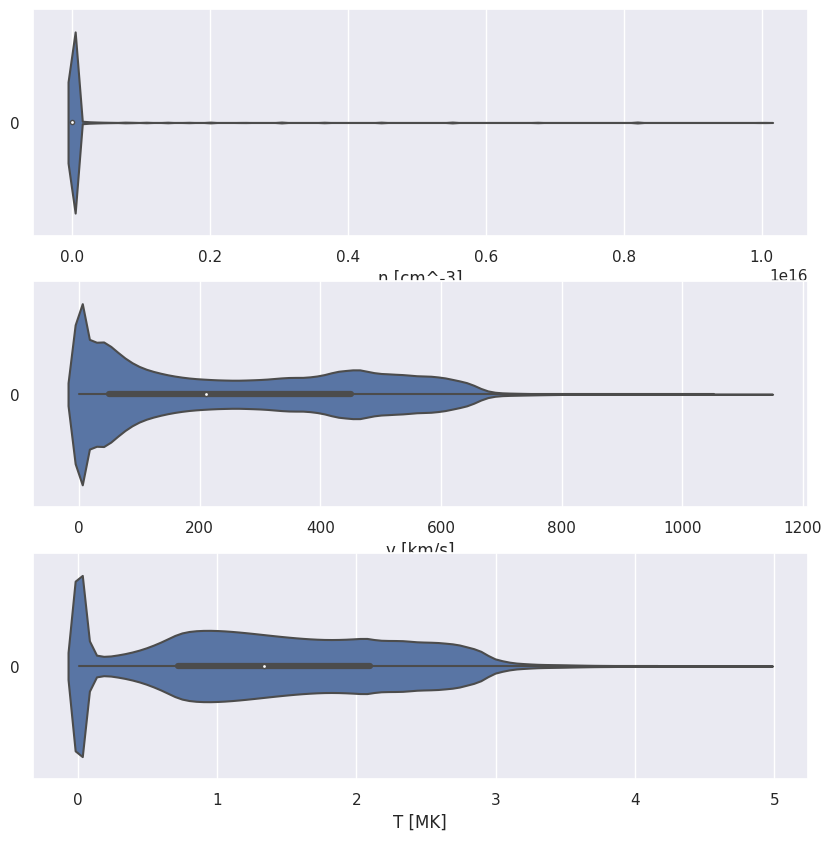

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))
sns.violinplot(outputs['n [cm^-3]'], ax=axs[0], orient='h')
sns.violinplot(outputs['v [km/s]'], ax=axs[1], orient='h')
sns.violinplot(outputs['T [MK]'], ax=axs[2], orient='h')

axs[0].set_xlabel('n [cm^-3]')
axs[1].set_xlabel('v [km/s]')
axs[2].set_xlabel('T [MK]')

<AxesSubplot: >

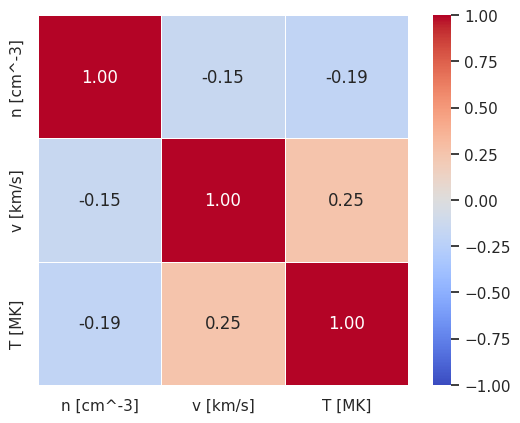

In [ ]:
outputs = outputs.astype(np.float64)
corr = outputs.corr()

fig, ax = plt.subplots()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, xticklabels=True,
                                                yticklabels=True, figure=fig, ax=ax, annot=True, fmt='.2f',
                                                cmap='coolwarm', linewidths=.5)

# Joint Analysis

In [ ]:
full_df = pd.concat([inputs, outputs], axis=1)
full_df

,R [Rsun],B [G],alpha [deg],n [cm^-3],v [km/s],T [MK]
0,1.000000,6.813160,-0.127607,1.000375e+16,3.315413e-07,0.006000
1,1.000104,6.811385,-0.126912,8.194385e+15,1.452716e-07,0.006000
2,1.000207,6.809607,-0.126205,6.716319e+15,2.123098e-07,0.006000
3,1.000311,6.807825,-0.125486,5.498820e+15,2.177507e-07,0.006000
4,1.000415,6.806039,-0.124753,4.506467e+15,3.132986e-07,0.006000
...,...,...,...,...,...,...
7532795,30.434133,-0.001184,0.000000,2.306855e+02,6.425001e+02,0.853518
7532796,30.695671,-0.001164,0.000000,2.278465e+02,6.430370e+02,0.844196
7532797,30.957904,-0.001144,0.000000,2.225775e+02,6.435724e+02,0.834600
7532798,31.220819,-0.001125,0.000000,2.198836e+02,6.441066e+02,0.824983


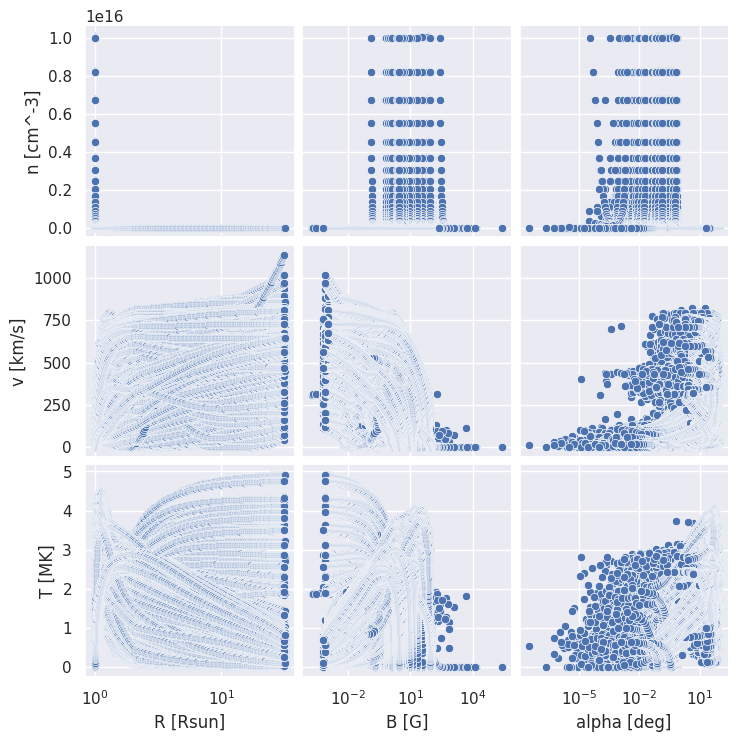

In [ ]:

pp = sns.pairplot(full_df, x_vars=['R [Rsun]', 'B [G]', 'alpha [deg]'], y_vars=['n [cm^-3]', 'v [km/s]', 'T [MK]'])
for ax in pp.axes.flat:
    ax.set_xscale("log")
    if ax.get_label() in ['B [G]']:
        ax.set_yscale("symlog")


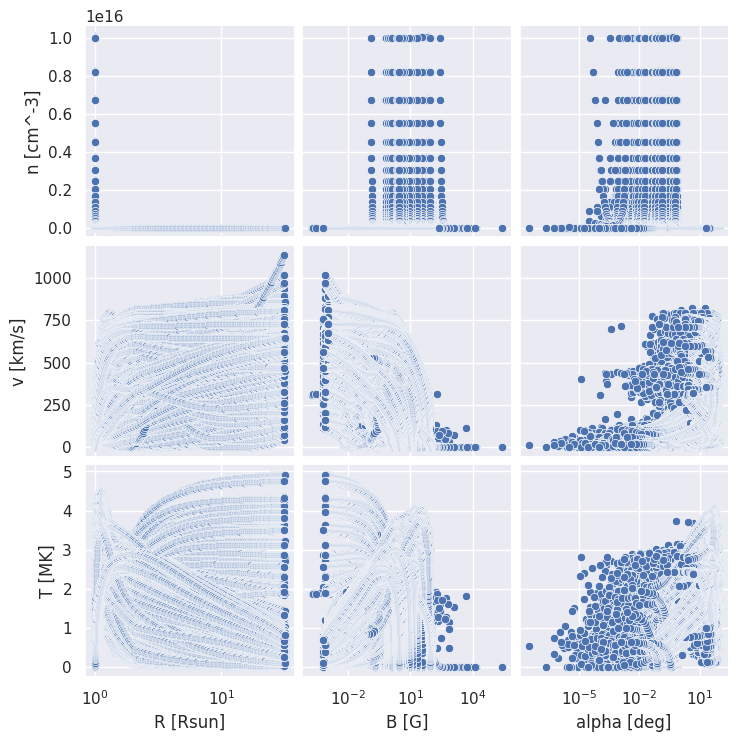

In [ ]:

pp = sns.pairplot(full_df, x_vars=['R [Rsun]', 'B [G]', 'alpha [deg]'], y_vars=['n [cm^-3]', 'v [km/s]', 'T [MK]'])
for ax in pp.axes.flat:
    ax.set_xscale("log")
    if ax.get_label() in ['n [cm^-3]', 'v [km/s]', 'T [MK]']:
        ax.set_yscale("log")

detetar e tirar o outlier de v e T

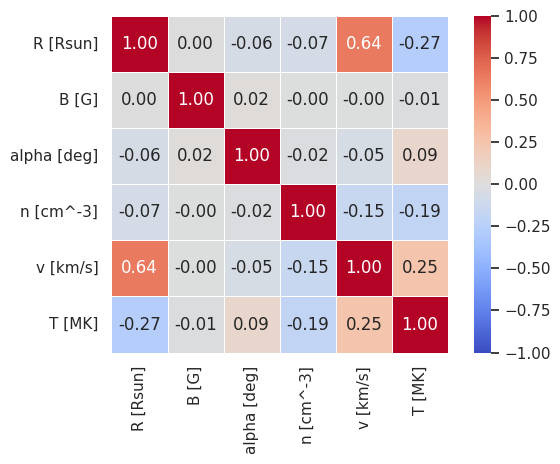

In [ ]:
corr = full_df.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, xticklabels=True,
                                                yticklabels=True, figure=fig, ax=ax, annot=True, fmt='.2f',
                                                cmap='coolwarm', linewidths=.5)
plt.tight_layout()